In [ ]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
x_train = np.linspace(-1,1,20)

In [ ]:
y_train = np.array([-0.6561,-0.3099,-0.59035,-0.50855,-0.285,
                    -0.2443,-0.02445,0.00135,-0.2006,0.07475,
                    -0.1422,0.06515,0.15265,0.3521,0.28415,
                    0.5524,0.23115,0.20835,0.4211,0.60485])

In [ ]:
x_test = np.linspace(-1,1,20)

In [ ]:
y_test = np.array([-0.069415,-0.451,-0.43005,-0.4484,-0.1475,
                   -0.5019,-0.28055,0.24595,-0.21425,-0.0286,
                   0.23415,0.46575,0.07955,0.1973,0.0719,
                   0.3639,0.5536,0.3365,0.50705,0.33435])

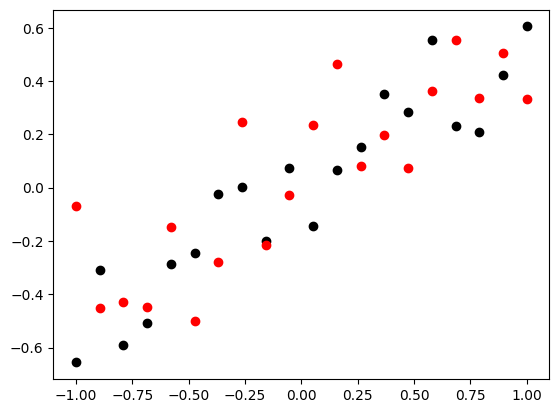

In [ ]:
plt.scatter(x_train,y_train,c='black',label='training_data')
plt.scatter(x_test,y_test,c='red',label='testing_data')
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.01)

In [ ]:
model.compile(
    loss = 'mse',
    optimizer = adam,
    metrics = ['mse']
)

In [ ]:
history = model.fit(x_train,y_train,epochs=500,validation_data = (x_test,y_test),verbose=0)


In [ ]:
# evaluate model
_,train_mse = model.evaluate(x_train,y_train,verbose=0)
_,test_mse = model.evaluate(x_test,y_test,verbose=0)

print("Train: ",train_mse, ", test_mse ",test_mse)

Train:  0.06736259162425995 , test_mse  0.07998432219028473


In [ ]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


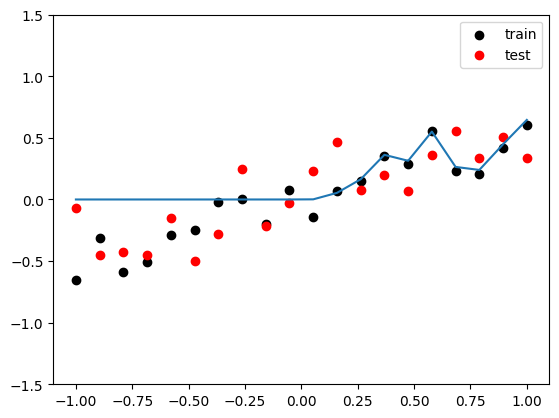

In [ ]:
plt.figure()
plt.scatter(x_train,y_train,c='black',label='train')
plt.scatter(x_test,y_test,c='red',label='test')
plt.plot(x_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

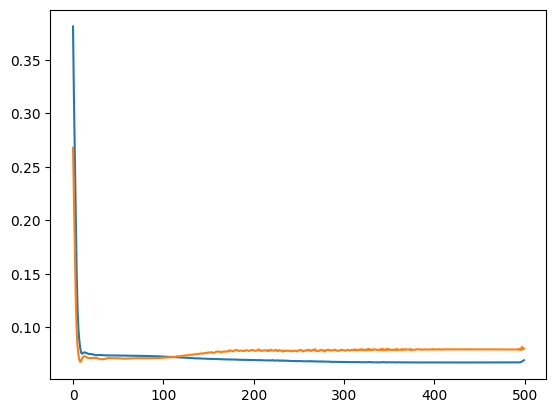

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])